In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import keras_tuner as kt
from tensorflow.keras.regularizers import l2

In [2]:
# Step 1: Load the Dataset
data = pd.read_csv('normalized gpa form.csv')
data


,Gender,Age,Family members count,Current residence,Parents status,Guardian,Fathers education,Mothers education,Guardians monthly income,self_supporting_activity,...,Do you take nutritions.,Do you love sports?,Do you value and have confidence of your opinions?,sleep_time? (7-8 hours)],Do you do self-directed learning?,study burnout,semester success belief,weather impact on focus,study planning,task consistency
0,Male,19,5,Own House,Other,Father,Graduation,Graduation,Between 75k to 100k,Freelancing,...,Sometimes,Always,Always,Rarely,Always,Often,Always,Often,Always,Often
1,Female,19,3,Own House,Together,Both Mother & Father,Graduation,Graduation,Between 50k to 75k,Freelancing,...,Sometimes,Often,Always,Often,Often,Often,Often,Always,Often,Often
2,Female,19,5,Own House,Together,Both Mother & Father,Graduation,Graduation,Between 100k to 150k,NaN,...,Always,Sometimes,Always,Sometimes,Always,Always,Often,Sometimes,Always,Always
3,Male,23,6,Own House,Together,Both Mother & Father,Graduation,Matric,Between 50k to 75k,Student,...,Sometimes,Always,Often,Always,Often,Always,Always,Never,Always,Often
4,Male,21,6,Rented House,Together,Both Mother & Father,Graduation,Matric,Between 150k to 200k,NaN,...,Often,Always,Always,Always,Always,Rarely,Always,Often,Rarely,Often
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,Male,22,7,Rented House,Together,Father,Master,Matric,Between 75k to 100k,Other,...,Sometimes,Always,Always,Often,Often,Often,Sometimes,Never,Often,Sometimes
959,Male,22,4,Own House,Together,Both Mother & Father,Matric,Intermediate,Between 10k to 25k,Part-Time Job,...,Rarely,Always,Often,Often,Often,Rarely,Always,Rarely,Always,Always
960,Male,22,4,Own House,Together,Father,Graduation,Intermediate,Between 25k to 50k,Still Struggling,...,Never,Always,Always,Always,Sometimes,Rarely,Sometimes,Never,Rarely,Rarely
961,Male,24,6,Own House,Together,Both Mother & Father,Matric,Matric,Father don't do any job,Teaching,...,Rarely,Sometimes,Rarely,Never,Rarely,Sometimes,Never,Rarely,Sometimes,Rarely


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Columns: 112 entries, Gender to task consistency
dtypes: float64(8), int64(7), object(97)
memory usage: 842.8+ KB


In [4]:
data.describe()

,Age,Family members count,previous sgpa,matric percentage,intermediate_percentage,nts_score,interest_in_domain,program_satisfaction,current_cgpa,subject_difficulty,subject_interest,health_status,teacher_methodology_preference,love_travelling,book_reading_interest
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,954.000000,963.000000,963.000000,963.000000,963.000000,959.000000,957.000000,963.000000,963.000000
mean,20.326064,5.857736,3.242679,104.584443,136.125625,77.477072,3.865828,3.720665,2.974675,3.366563,3.157840,3.673618,3.128527,3.970924,2.959502
std,2.264160,3.756285,8.383842,121.231487,335.964746,20.721207,1.068889,1.159727,3.184452,1.017315,1.034744,1.056268,1.033534,1.184264,1.305442
min,17.000000,1.000000,0.000100,0.100000,0.100000,0.100000,1.000000,1.000000,0.000010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,5.000000,2.570000,85.000000,76.000000,74.000000,3.000000,3.000000,2.620000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,20.000000,6.000000,2.900000,89.800000,83.000000,80.000000,4.000000,4.000000,2.900000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,21.000000,6.000000,3.280000,93.000000,89.000000,84.000000,5.000000,5.000000,3.210000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,69.000000,108.000000,238.000000,1090.000000,8678.000000,420.000000,5.000000,5.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# Step 2: Handle Missing Data
# Impute numerical columns with their median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
data[numerical_columns] = imputer_num.fit_transform(data[numerical_columns])

# Impute categorical columns with the most frequent value
categorical_columns = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_cat.fit_transform(data[categorical_columns])


In [6]:
# Step 3: Encoding Categorical Variables
# Label Encoding for binary categories and One-Hot Encoding for others
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

for col in categorical_columns:
    if data[col].nunique() == 2:  # Binary categories
        data[col] = label_encoder.fit_transform(data[col])
    else:  # Non-binary categories
        encoded = one_hot_encoder.fit_transform(data[[col]])
        encoded_df = pd.DataFrame(encoded, columns=[f"{col}_{cat}" for cat in one_hot_encoder.categories_[0][1:]])
        data = pd.concat([data, encoded_df], axis=1)
        data.drop(columns=[col], inplace=True)



In [7]:
# Step 4: Feature Scaling
# Assuming 'current_cgpa' is the target
target_column = 'current_cgpa'
X = data.drop(columns=[target_column]).values
y = data[target_column].values





In [8]:
# Scaling features and target
scaler = MinMaxScaler()


X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))


# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)



In [24]:
X_train.shape

(770, 1070)

In [64]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=1070, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.1))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [70]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 128)                 │         137,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_50 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_51 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_51               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_52 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 443,909 (1.69 MB)

 Trainable params: 147,841 (577.50 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 295,684 (1.13 MB)

In [65]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [66]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [67]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stop])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.5512 - mae: 0.8430 - val_loss: 0.3005 - val_mae: 0.0859
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9185 - mae: 0.6183 - val_loss: 0.2856 - val_mae: 0.0837
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6438 - mae: 0.4675 - val_loss: 0.2828 - val_mae: 0.0841
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5741 - mae: 0.4287 - val_loss: 0.2819 - val_mae: 0.0859
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5039 - mae: 0.3784 - val_loss: 0.2810 - val_mae: 0.0891
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4571 - mae: 0.3441 - val_loss: 0.2801 - val_mae: 0.0907
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4366 - mae: 0.3232 - val_loss: 0.2788 - val_mae: 0.0903
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4296 - mae: 0.3124 - val_loss: 0.2771 - val_mae: 0.0884
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.40

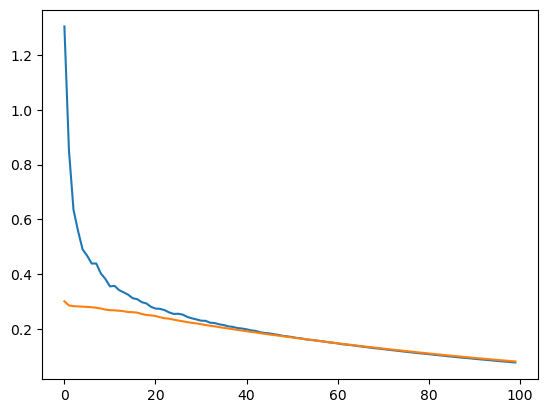

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

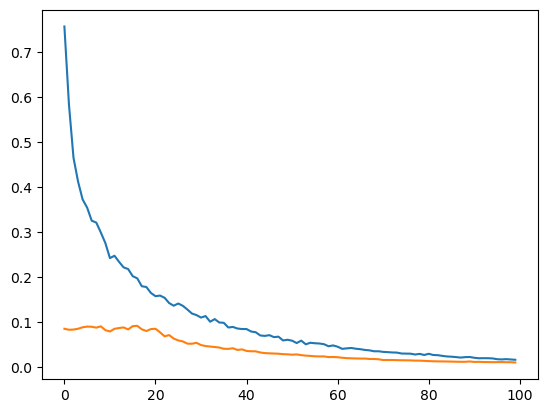

In [69]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])